# Shear strength envelopes

© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/eamontoyaa/EAFIT_slope_stability/blob/main/notebooks/strength_envelopes.ipynb).



## Required modules

In [1]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, widgets, fixed

## Global configuration for plots

In [2]:
plt.style.use("default")
# plt.rcParams["image.cmap"] = "brg"
# mpl.rcParams['axes.color_cycle'] = plt.get_cmap("brg")
mpl.rcParams.update(
    {
        "font.family": "serif",  # Use the Computer modern font
        "font.serif": "cmr10",
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
plt.style.use("default")
colors = ("#DDAA33", "#BB5566", "#004488")

In [3]:
def strength_envelope(
    normal_stress,
    shear_stress,
    plot_parabola=False,
    plot_tang2parab=False,
    sigma_n=150,
):
    line_parameters = polyfit(normal_stress, shear_stress, deg=1)
    c, tan_phi = line_parameters
    phi = np.degrees(np.arctan(tan_phi))
    envelope_MC = np.poly1d(np.flip(line_parameters))

    parab_param = polyfit(normal_stress, shear_stress, deg=2)
    envelope_parab = np.poly1d(np.flip(parab_param))

    tan_phi_parab = np.tan(2 * parab_param[-1] * sigma_n + parab_param[-2])
    phi_par = np.degrees(np.arctan(tan_phi_parab))
    c_parab = envelope_parab(sigma_n) - tan_phi_parab * sigma_n
    line_parameters_parab = (c_parab, tan_phi_parab)
    envelope_MC_parab = np.poly1d(np.flip(line_parameters_parab))

    sigma2plot = np.linspace(0, max(normal_stress) * 1.3, 50)
    # stress vs horizontal deformation plot
    fig = plt.figure(figsize=[10, 5.3])
    ax = fig.add_subplot(111)
    ax.plot(normal_stress, shear_stress, "ok", ms=10)
    ax.plot(
        sigma2plot,
        envelope_MC(sigma2plot),
        ls="-",
        color="k",
        label="$\\tau="
        + f"{c:.1f}"
        + "+\\tan("
        + f"{phi:.1f}"
        + "^\\circ )\\sigma_\\mathrm{n}$",
    )
    if plot_parabola:
        ax.plot(
            sigma2plot,
            envelope_parab(sigma2plot),
            ls="--",
            color='k',
            label="Parabola fitting",
        )
    if plot_tang2parab:
        ax.plot(
            sigma2plot,
            envelope_MC_parab(sigma2plot),
            ls="--",
            color=colors[1],
            label="$\\tau_\mathrm{\\sigma_\\mathrm{n}^\star}="
            + f"{c_parab:.1f}"
            + "+\\tan("
            + f"{phi_par:.1f}"
            + "^\\circ )\\sigma_\\mathrm{n}$",
        )
        ax.plot(
            sigma_n,
            envelope_MC_parab(sigma_n),
            ls="",
            marker="*",
            ms=12,
            color='k',
            label="$\\sigma_\\mathrm{n}^\star$",
        )
    ax.set_xlabel("normal stress, $\\sigma_\\mathrm{n}$   [$\\mathrm{kPa}$]")
    ax.set_ylabel("shear stress $\\tau$   [$\\mathrm{kPa}$]")
    tau_max = max(shear_stress)
    sig_max = max(shear_stress)
    ax.axis("image")
    ax.set_ylim(
        (
            0,
            max(
                tau_max,
                envelope_MC(sigma2plot[-1]),
                envelope_parab(sigma2plot[-1]),
            ),
        )
    )
    ax.set_xlim((0, sigma2plot[-1]))
    ax.grid(True, ls="--", lw=0.5)
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.legend()
    return np.round((phi, c), 1)


In [4]:
style = {'description_width': '50px'}
interact(  # Interactive widgets
    strength_envelope,
    normal_stress=fixed([100, 200, 400]),
    shear_stress=fixed([90, 145, 220]),
    plot_parabola=widgets.Checkbox(value=False, description="Plot parabola fitting?", style=style),
    plot_tang2parab=widgets.Checkbox(value=False, description="Plot tangent to parabola at 𝜎★?", style=style),
    sigma_n=widgets.FloatSlider(value=150, min=0, max=500, step=0.2, description="𝜎★", style=style)
)


interactive(children=(Checkbox(value=False, description='Plot parabola fitting?', style=DescriptionStyle(descr…

<function __main__.strength_envelope(normal_stress, shear_stress, plot_parabola=False, plot_tang2parab=False, sigma_n=150)>

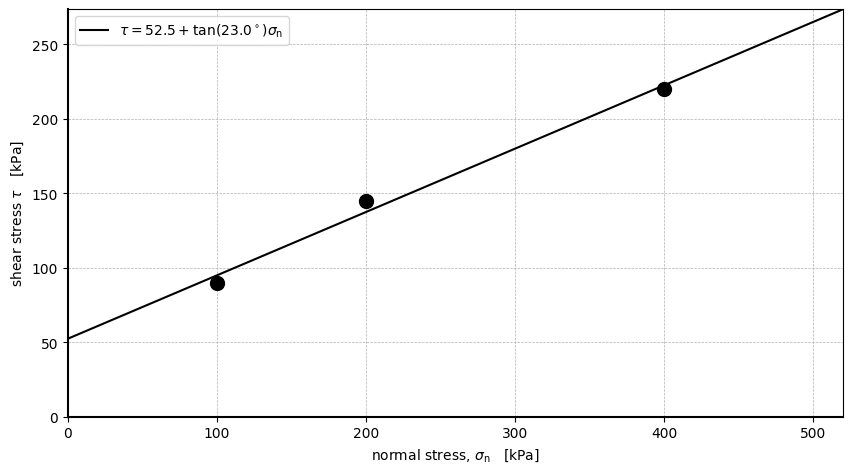

In [5]:
strength_envelope(
    normal_stress=[100, 200, 400],
    shear_stress=[90, 145, 220],
    plot_parabola=False,
    plot_tang2parab=False,
    sigma_n=150,
);
